In [18]:
!pip3 install nb_black

<IPython.core.display.Javascript object>

In [39]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import (
    Lambda,
    Conv2D,
    MaxPooling2D,
    Dropout,
    Flatten,
    BatchNormalization,
    Activation
)

%reload_ext nb_black

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
digits = load_digits()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
digits_data = digits.data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
digits_data.shape

(1797, 64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
type(digits_data)

numpy.ndarray

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.images, digits.target, test_size=0.2, random_state=42, shuffle=True
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
# summarize dataset shape
print("Train", X_train.shape, y_train.shape)
print("Test", (X_test.shape, y_test.shape))
# summarize pixel values
print("Train", X_train.min(), X_train.max(), X_train.mean(), X_train.std())
print("Test", y_test.min(), y_test.max(), y_test.mean(), y_test.std())

Train (1437, 8, 8) (1437,)
Test ((360, 8, 8), (360,))
Train 0.0 16.0 4.891233907446068 6.024576901647179
Test 0 9 4.6194444444444445 2.7793204049875655


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

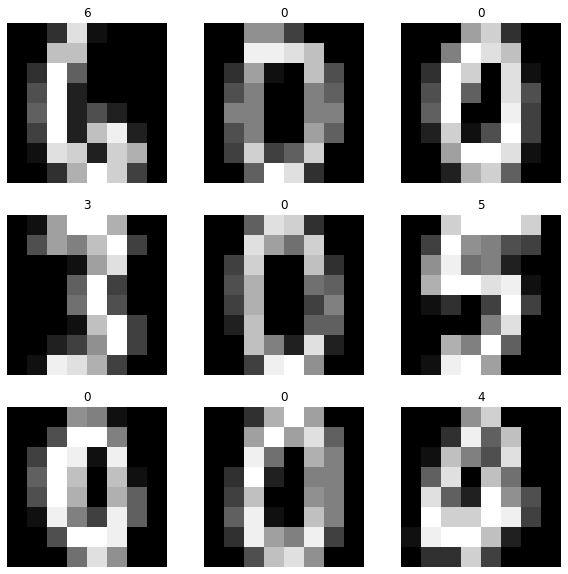

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
def display9Images():
    row = 3
    col = 3
    f, grid = plt.subplots(row, col, figsize=(10, 10))
    grid = grid.flatten()
    for image, label, pos in zip(X_train[: (row * col)], y_train[: (row * col)], grid):
        pos.imshow(image, cmap="gray")
        pos.set_title(label)
        pos.axis("off")


display9Images()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


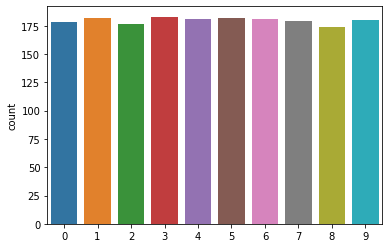

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
sns.countplot(digits.target)
plt.show()

In [31]:
dataset_mean = X_train.mean()  # Test dataset's mean
dataset_std = X_train.std()  # Train dataset's standard deviation


def computeStandardization(x):
    return (x - dataset_mean) / dataset_std  # (x-u)/sigma


def multi_classification_cnn(opt):
   
    '''
    Define our sequential model framework from the open-source library called Keras.
    '''
    model = Sequential()  
    
    '''
    Add Input Layer-1: Process every image through this layer. We will process a single input image of dimension 8x8. 
    '''
    model.add(
        Lambda(
            computeStandardization, input_shape=(8,8,1), name="standardize_layer"
        )
    )

    '''
    Add Hidden Layer-2: This is the convulational layer, where we have 32 
    kernels or filters with each of size 3x3. Kernel Ki i∈{1,2..32} and a single 8x8 image X will generate 32 
    feature maps of dimension 6x6 (8-3+1,8-3+1). Hence for 1 image, there will be 32 6x6 feature maps.
    Lastly, Activation relu is added for non-linearity transformation for every single image.
    '''
    model.add(Conv2D(filters=32, kernel_size=(3, 3), name="convulational_layer"))
    model.add(Activation("relu"))
    
    '''
    Add Hidden Layer-3: Converts the previous layer's n-dimensional matrix output(6,6,32) to 1-dimensional vector X (1152,1) (6*6*32,1)
    '''
    model.add(Flatten())
    
    '''
    Add Hidden Layer-4: Feeds the nx1 dimension vector x into 64 neurons. After that, Weights w1 of dimensions nx64 is
    initialized with random values and bias b1 of dimensions (64 x 1) is initiliazed with all 1.0. 
    Then the output layer will be Z1 = (w1T)x + b1 (w1T is w1's transpose) of dimension 64x1. Finally to make Z1 non-linear, 
    the relu activation function is applied and the final output is a1 = relu(Z1) and a1's dimension is 64x1 vector.
     '''
    model.add(Dense(64))
    model.add(Activation("relu"))
    
    '''
    Add Output Layer-5: Again randomly generate weights w2 of dimensions nx10 and bias b2 of dimensions(10x1).
    Then using the previous layer's a1, a new output layer is generated called Z2 = = (w2T)a1 + b2 
    (w2T is w2's transpose) with dimensions 10x1. Finally to compute the probabilities of most likely class predictions, 
    a probability vector of dimensions 10x1 is calculated with the softmax function.
    '''
    model.add(Dense(10))
    model.add(Activation("softmax"))

    '''
    The model is compiled using a custom optimizer, loss function and metric measure to compare model accuracy.
    '''
    model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
    
    return model # final model is returned here.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
from timeit import default_timer as timer

class TimingCallback(keras.callbacks.Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(timer()-self.starttime)

cb_vanilla = TimingCallback()
cb_stochastic = TimingCallback()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [50]:
def reset_weights(model):
    weights = model.get_weights()
    model.set_weights(weights)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
y_train_categorical = keras.utils.to_categorical(y_train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
optimizer_van = keras.optimizers.SGD(learning_rate=0.01) # Create opitmizer over here wiith alpha learning rate of 0.01
optimizer_sgd = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9) # Create opitmizer over here wiith alpha learning rate of 0.01
cnn_model_van = multi_classification_cnn(optimizer_van) # Call our neural network from fig 1.2
cnn_model_sgd = multi_classification_cnn(optimizer_sgd) # Call our neural network from fig 1.2

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [86]:
# Reset weights for retraining 
# reset_weights(cnn_model_sgd)
# reset_weights(cnn_model_van)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [87]:
'''
We train the model here. Notice we use batch_size as the size of the whole dataset and that indicates vanilla gradient descent and
if the batch_size is only 1 then it will indicate we are using stochastic gradient descent.We train our model using 200 epochs or iterations
and validation_split, verbose and callback parameters are internel Keras parameters that are not related to the main problem.
'''
history_vanilla_grad = cnn_model_van.fit(X_train, y_train_categorical, validation_split=0.20, epochs=200, verbose=1, batch_size=len(X_train),callbacks=[cb_vanilla])

Epoch 1/200
1/1 [==============================] - 0s 92ms/step - loss: 0.2482 - accuracy: 0.9504 - val_loss: 0.2905 - val_accuracy: 0.9375
Epoch 2/200
1/1 [==============================] - 0s 41ms/step - loss: 0.2475 - accuracy: 0.9504 - val_loss: 0.2899 - val_accuracy: 0.9375
Epoch 3/200
1/1 [==============================] - 0s 40ms/step - loss: 0.2468 - accuracy: 0.9513 - val_loss: 0.2894 - val_accuracy: 0.9375
Epoch 4/200
1/1 [==============================] - 0s 40ms/step - loss: 0.2462 - accuracy: 0.9513 - val_loss: 0.2888 - val_accuracy: 0.9375
Epoch 5/200
1/1 [==============================] - 0s 40ms/step - loss: 0.2455 - accuracy: 0.9513 - val_loss: 0.2882 - val_accuracy: 0.9375
Epoch 6/200
1/1 [==============================] - 0s 40ms/step - loss: 0.2448 - accuracy: 0.9513 - val_loss: 0.2876 - val_accuracy: 0.9375
Epoch 7/200
1/1 [==============================] - 0s 40ms/step - loss: 0.2442 - accuracy: 0.9513 - val_loss: 0.2871 - val_accuracy: 0.9375
Epoch 8/200
1/1 [===

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [54]:
history_stochastic_grad = cnn_model_sgd.fit(X_train, y_train_categorical, validation_split=0.20, epochs=200, verbose=1, batch_size=1,callbacks=[cb_stochastic])

Epoch 1/200
1149/1149 [==============================] - 3s 2ms/step - loss: 1.0851 - accuracy: 0.6658 - val_loss: 0.2742 - val_accuracy: 0.9410
Epoch 2/200
1149/1149 [==============================] - 2s 2ms/step - loss: 0.1947 - accuracy: 0.9465 - val_loss: 0.1789 - val_accuracy: 0.9514
Epoch 3/200
1149/1149 [==============================] - 3s 2ms/step - loss: 0.0987 - accuracy: 0.9681 - val_loss: 0.1345 - val_accuracy: 0.9618
Epoch 4/200
1149/1149 [==============================] - 2s 2ms/step - loss: 0.0452 - accuracy: 0.9852 - val_loss: 0.1192 - val_accuracy: 0.9618
Epoch 5/200
1149/1149 [==============================] - 3s 2ms/step - loss: 0.0543 - accuracy: 0.9870 - val_loss: 0.0714 - val_accuracy: 0.9688
Epoch 6/200
1149/1149 [==============================] - 2s 2ms/step - loss: 0.0320 - accuracy: 0.9908 - val_loss: 0.0733 - val_accuracy: 0.9688
Epoch 7/200
1149/1149 [==============================] - 2s 2ms/step - loss: 0.0108 - accuracy: 0.9980 - val_loss: 0.0765 - val_ac

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [88]:
print("Time to train batch gradient descent in seconds:", round(sum(cb_vanilla.logs),3))
print("Time to train stochastic gradient descent in seconds:", round(sum(cb_stochastic.logs),3))

Time to train batch gradient descent in seconds: 42.315
Time to train stochastic gradient descent in seconds: 583.686


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

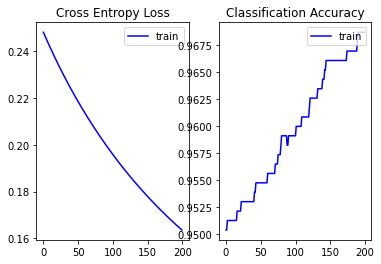

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [96]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
    # plot loss
    pyplot.subplot(1, 2, 1)
    pyplot.title("Cross Entropy Loss")
    pyplot.plot(histories.history["loss"], color="blue", label="train")
    plt.legend(loc="upper right")
    # plot accuracy
    pyplot.subplot(1, 2, 2)
    pyplot.title("Classification Accuracy")
    pyplot.plot(histories.history["accuracy"], color="blue", label="train")
    plt.legend(loc="upper right")
    pyplot.show()
summarize_diagnostics(history_vanilla_grad)

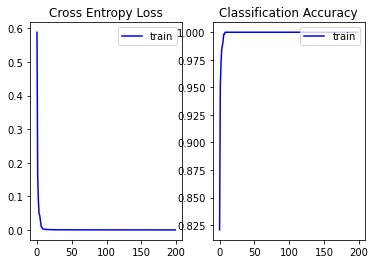

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [97]:
summarize_diagnostics(history_stochastic_grad)

In [59]:
cnn_model_van.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
standardize_layer (Lambda)   (None, 8, 8, 1)           0         
_________________________________________________________________
convulational_layer (Conv2D) (None, 6, 6, 32)          320       
_________________________________________________________________
activation_9 (Activation)    (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                73792     
_________________________________________________________________
activation_10 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

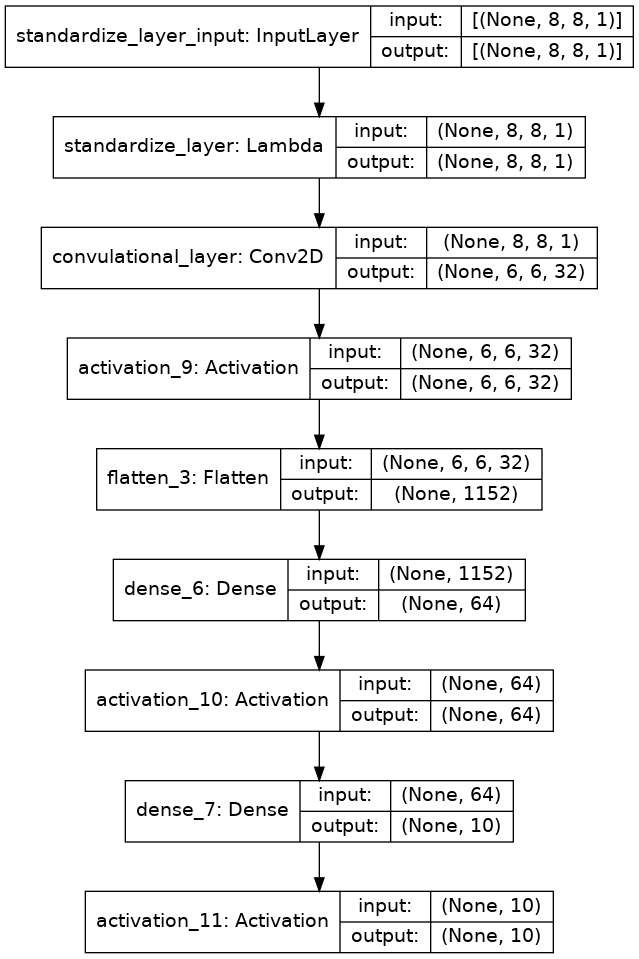

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [60]:
keras.utils.plot_model(cnn_model_van, show_shapes= True, rankdir='TB')

In [84]:
print("SGD Model's accuracy on the test set is", cnn_model_sgd.evaluate(X_test, keras.utils.to_categorical(y_test))[1]*100,"%")

12/12 [==============================] - 0s 2ms/step - loss: 0.0740 - accuracy: 0.9861
SGD Model's accuracy on the test set is 98.61111044883728 %


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [85]:
print("SGD Model's accuracy on the test set is", cnn_model_van.evaluate(X_test, keras.utils.to_categorical(y_test))[1]*100,"%")

12/12 [==============================] - 0s 2ms/step - loss: 0.2481 - accuracy: 0.9444
SGD Model's accuracy on the test set is 94.44444179534912 %


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [80]:
# https://stackoverflow.com/questions/43137288/how-to-determine-needed-memory-of-keras-model/45242364
def get_model_memory_usage(batch_size, model):
    import numpy as np
    try:
        from keras import backend as K
    except:
        from tensorflow.keras import backend as K

    shapes_mem_count = 0
    internal_model_mem_count = 0
    for l in model.layers:
        layer_type = l.__class__.__name__
        if layer_type == 'Model':
            internal_model_mem_count += get_model_memory_usage(batch_size, l)
        single_layer_mem = 1
        out_shape = l.output_shape
        if type(out_shape) is list:
            out_shape = out_shape[0]
        for s in out_shape:
            if s is None:
                continue
            single_layer_mem *= s
        shapes_mem_count += single_layer_mem

    trainable_count = np.sum([K.count_params(p) for p in model.trainable_weights])
    non_trainable_count = np.sum([K.count_params(p) for p in model.non_trainable_weights])

    number_size = 4.0
    if K.floatx() == 'float16':
        number_size = 2.0
    if K.floatx() == 'float64':
        number_size = 8.0

    total_memory = number_size * (batch_size * shapes_mem_count + trainable_count + non_trainable_count)
    gbytes = np.round(total_memory / (1024.0 ** 3), 6) + internal_model_mem_count
    return gbytes

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [83]:
memory_sgd = get_model_memory_usage(1, cnn_model_sgd)
memory_van = get_model_memory_usage(len(X_train), cnn_model_van)
print("Vanilla Gradient Descent Model utilizes", memory_van*1000, "megabytes")
print("Stochastic Gradient Descent Model utilizes", memory_sgd*1000, "megabytes")

Vanilla Gradient Descent Model utilizes 19.914 megabytes
Stochastic Gradient Descent Model utilizes 0.292 megabytes


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>